# **Saudi Arabia Used Cars**

[Sumber data Saudi Arabia Used Cars](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset) 

### **Contents**

1. Business Problem Understanding
2. Data Preprocessing (Cleaning & EDA)
3. Modeling
4. Conclusion
5. Recommendation

****

# **Business Problem Understanding**

**Context**

This is the Saudi Arabia Used Cars data retreived from syarah.com's website. syarah.com is a website which connects seller and potential buyers of the used cars in Saudi Arabia. The website has various car types to sell from diffrent regions across Saudi Arabia.

syarah.com let seller's used car owners to decide their own used car's price. For some sellers, it might be a bit confusing to set a price since not every seller understand the second-hand of used cars market. It can be set too expensive/too cheap. There are lots of factors that determine the used car's price.

**Problem Statement**

One of the challenge for marketplace website like syarah.com is to attract buyers and sellers transact within the website. In order to do that, they have to make the platform more consumer-friendly by adding features and recommendations.

Since the used car's sellers can set up the price whatever the seller wants to, giving price recommendations based on the overall market's data can make people more convenient to sell their used cars in the website. Sellers can sell with a competitive price and they can put a higher price with the used car's prominent that the seller has which they consider it to be necessary. **With the purpose of increasing the website's volume transactions, determining the right price to stay competitive in the used cars marketplace is very important. So that more people will get more convenient in selling their used cars on the website with the help of price recommendations. Thus, more profit/commision to the website**

**Goals**

Based on this problem, syarah.com requires to have a 'tool' that can predict and help sellers to be able to **determine the right price of used cars for them to sell**. The differences in the various features found can increase the accuracy of the selling price prediction, which can bring profit for the seller, and of course still affordable for the buyer.


**Analytic Approach**

What we need to do is analyze the data in order to find patterns from the existing features, what distinguish one features from another.

Next, we will build a regression model that will help the company to provide a used car price prediction 'tool' which will be used by the syarah.com website to provide recommendations to prospective sellers in determining the best price for used cars to be sold.

**Metric Evaluation**

The evaluation metrics that will be used are RMSE, MAE, and MAPE.
- RMSE is the mean value of the square root of the error
- MAE is the average absolute value of the error
- MAPE is the average percentage error generated by the regression model.
The smaller the RMSE, MAE, and MAPE values, the more accurate the model in predicting the used car price according to the limitations of the features used.

In addition, we can also use the value of R-squared or adj. R-squared is the model if the model that will be selected as the final model is a linear model. 
The R-squared value is used to determine how well the model can represent the overall variance of the data. The closer to 1, the more fit the model is to the observation data. However, this metric is not valid for non-linear models.

### **Data Understanding**

- The dataset contains 5624 records of used cars collected from syarah.com.
- Setiap baris data merepresentasikan informasi terkait properti dan pemiliknya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The company name |
| Gear_Type | Object | Gear type size of used car |
| Origin | Object | Origin of used car |
| Options | Object | Options of used car |
| Year | Integer | Manufacturing year |
| Engine_Size | Float | The engine size of used car |
| Mileage | Integer | Mileage |
| Negotiable | Boolean | True if the price is 0, that means it's negotiable (No set price) |
| Price | Integer | Used car price |

<br>

In [1119]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1315]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [1121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


# **Data Preprocessing (Cleaning & EDA)**

**Missing Value**

In [1122]:
# missing values

df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [1123]:
df[df['Price']==0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [1124]:
df['Negotiable'].value_counts()

False    3828
True     1796
Name: Negotiable, dtype: int64

In [1316]:
df=df[df['Price']>0]

- There are so many data that price = 0. This belongs to cars that are negotiable. Thus, I consider Price=0 as an invalid data/missing values

In [1126]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

In [1127]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype,df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
    df[col].nunique(),list(df[col].sample(2).values)])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,320,"[Yukon, Camry]"
1,Region,object,0,0.0,27,"[Dammam, Riyadh]"
2,Make,object,0,0.0,56,"[Toyota, Hyundai]"
3,Gear_Type,object,0,0.0,2,"[Automatic, Automatic]"
4,Origin,object,0,0.0,4,"[Saudi, Saudi]"
5,Options,object,0,0.0,3,"[Standard, Full]"
6,Year,int64,0,0.0,41,"[2020, 2020]"
7,Engine_Size,float64,0,0.0,65,"[1.5, 2.5]"
8,Mileage,int64,0,0.0,1346,"[85000, 270000]"
9,Negotiable,bool,0,0.0,1,"[False, False]"


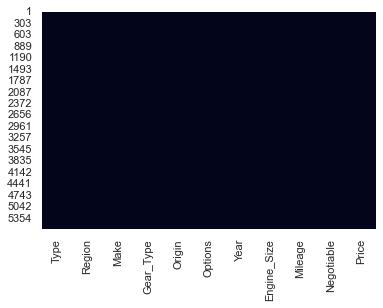

In [1128]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False);

In [1129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3827 non-null   object 
 1   Region       3827 non-null   object 
 2   Make         3827 non-null   object 
 3   Gear_Type    3827 non-null   object 
 4   Origin       3827 non-null   object 
 5   Options      3827 non-null   object 
 6   Year         3827 non-null   int64  
 7   Engine_Size  3827 non-null   float64
 8   Mileage      3827 non-null   int64  
 9   Negotiable   3827 non-null   bool   
 10  Price        3827 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 332.6+ KB


- Check duplicate values, there are only 4 duplicated values, so we'll drop it

In [1130]:
df.duplicated().value_counts()

False    3824
True        3
dtype: int64

In [1131]:
# df=df.drop_duplicates()

- First we'll look at the distribution of the price

Based on the distribution plot of used cars prices above, it can be seen that there is a 'right-skewed distribution'. In other words, there is a positive skewness in the price feature.

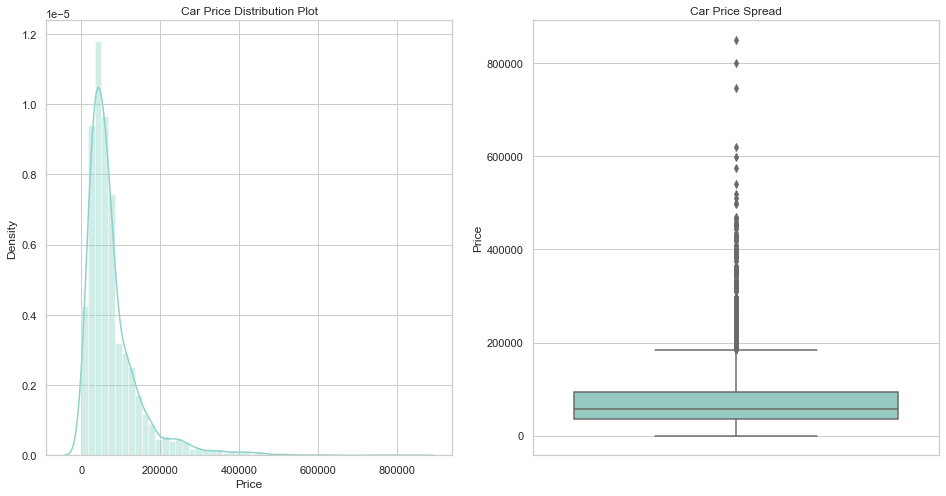

In [1132]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['Price'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['Price'])
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

- Mostly Automatic used cars are sold, and automatic used cars are more expensive

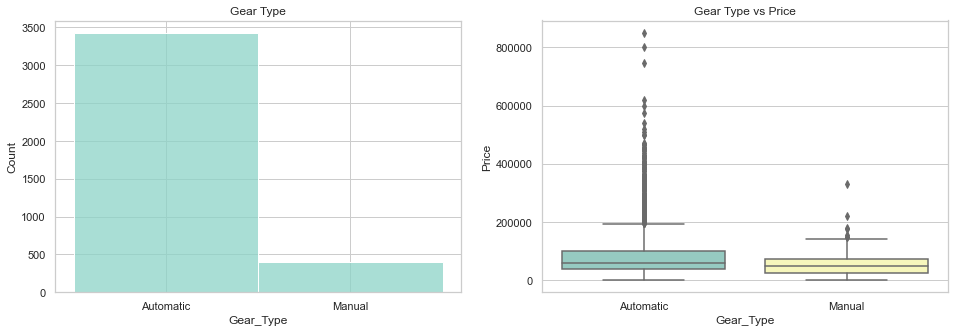

In [1133]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title('Gear Type')
sns.histplot(df['Gear_Type'])

plt.subplot(1,2,2)
plt.title('Gear Type vs Price')
sns.boxplot(x=df['Gear_Type'],y=df['Price'])
plt.show()

- As we can see, car brand can give a clue that the more luxurious the brand is, the price of the used cars are more expensive by average.

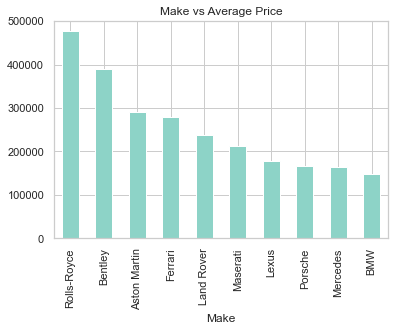

In [1134]:
bar1=df.groupby(['Make'])['Price'].mean().sort_values(ascending = False).head(10)
bar1
bar1.plot.bar()
plt.title('Make vs Average Price')
plt.show()

- As we can see, year can give a clue that the more recent the used cars is, the price of the used cars are more expensive by average.

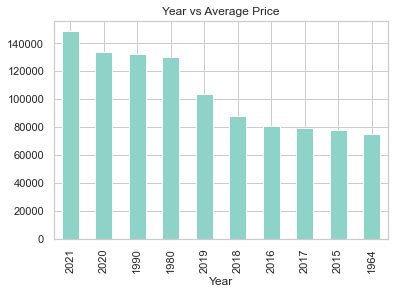

In [1135]:
bar1=df.groupby(['Year'])['Price'].mean().sort_values(ascending = False).head(10)
bar1
bar1.plot.bar()
plt.title('Year vs Average Price')
plt.show()

- As we can see, year can give a clue that the more recent the used cars is, the price of the used cars are more expensive by average.

- This is the distribution of the used car based on the area

Top three regions the used cars was sold are Riyadh(1st), Dammam(2nd), Jeddah(3rd), etc.

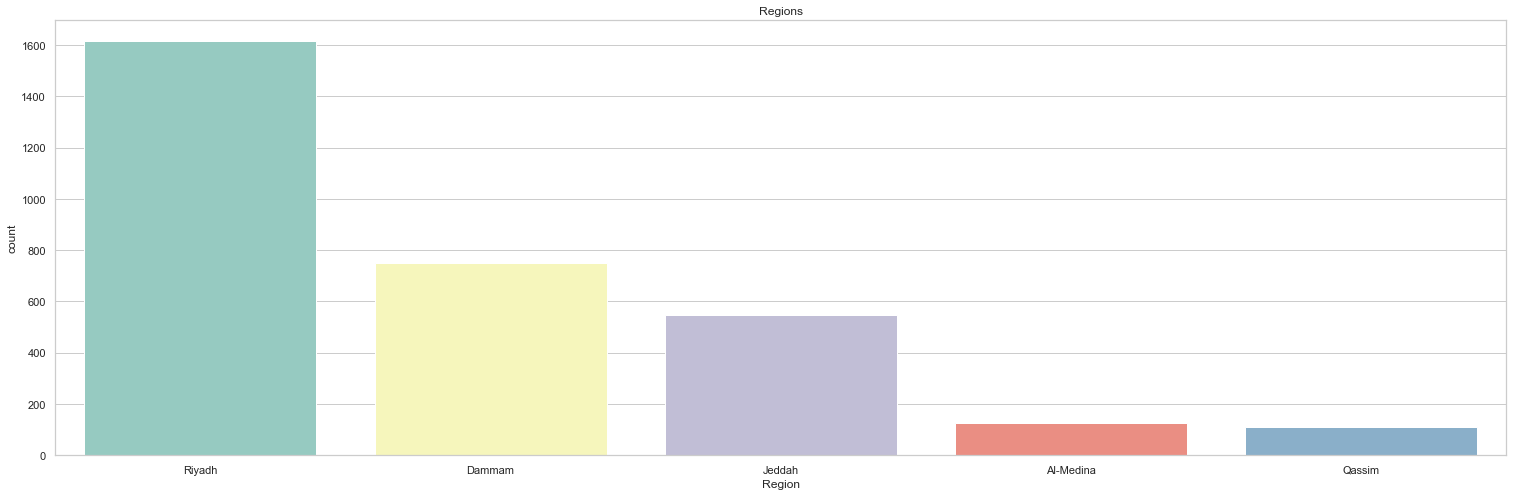

In [1136]:

plt.figure(figsize=(26,8))
plt.title('Regions')
sns.countplot(df['Region'],order = df['Region'].value_counts().head(5).index)
plt.show()

- Dammam region has the highest price of used cars

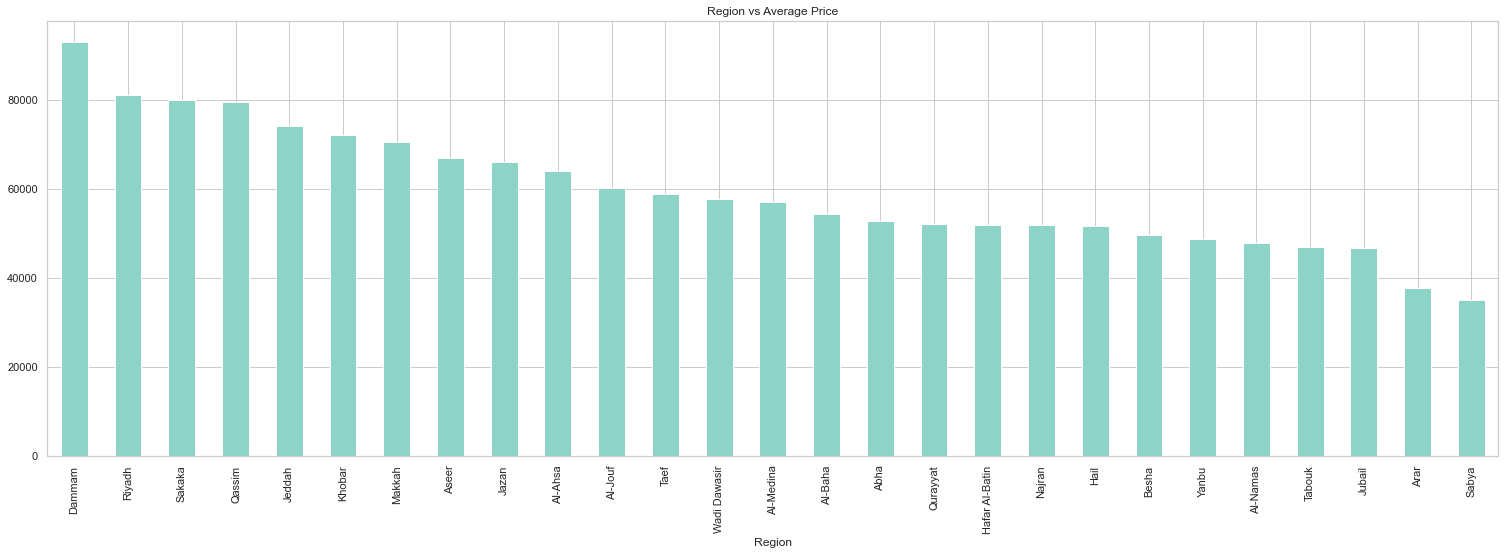

In [1137]:
plt.figure(figsize=(26,8))
bar1=df.groupby(['Region'])['Price'].mean().sort_values(ascending = False)
bar1.plot.bar()
plt.title('Region vs Average Price')
plt.show()

- Toyota made the most sales of the used cars

<AxesSubplot:xlabel='Make', ylabel='count'>

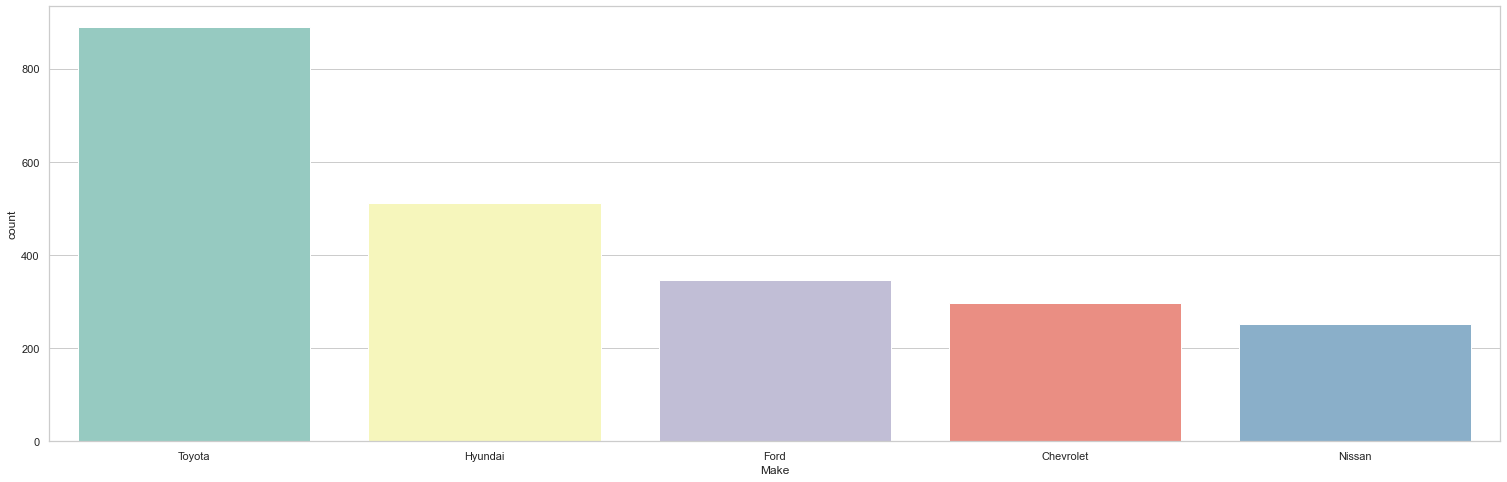

In [1138]:
plt.figure(figsize=(26,8))
sns.countplot(df['Make'],order = df['Make'].value_counts().head(5).index)

- As we can see, most of the used cars sold are cars manufactured in 2016

<AxesSubplot:xlabel='Year', ylabel='count'>

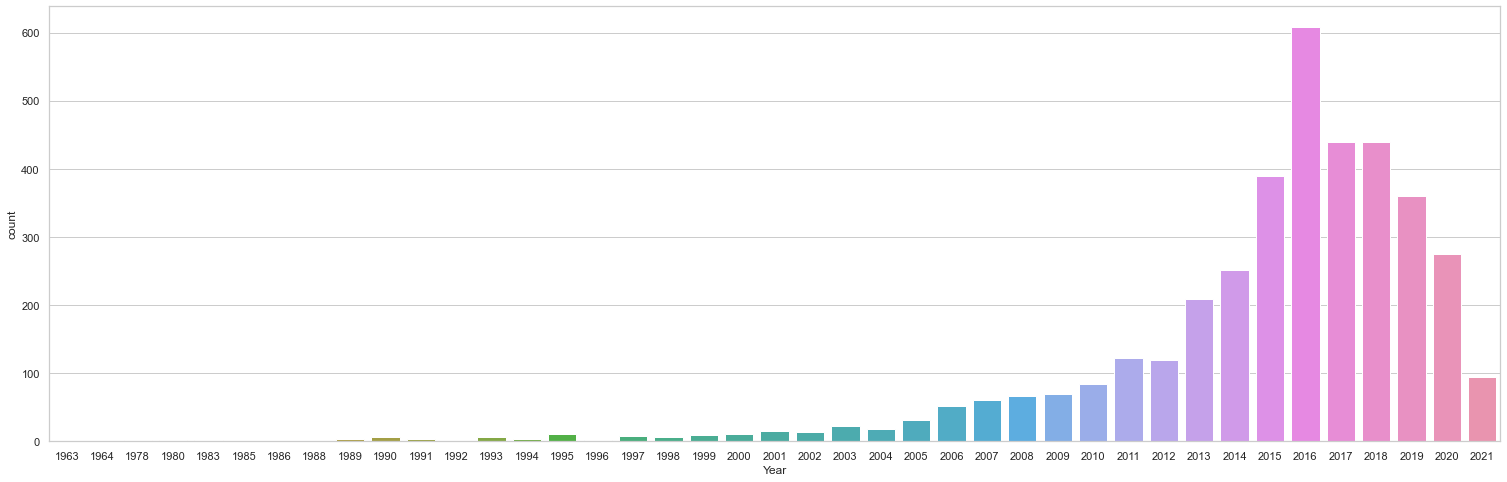

In [1139]:
plt.figure(figsize=(26,8))
sns.countplot(df['Year'])

- Most options of the used cars are in Full options

<AxesSubplot:xlabel='Options', ylabel='count'>

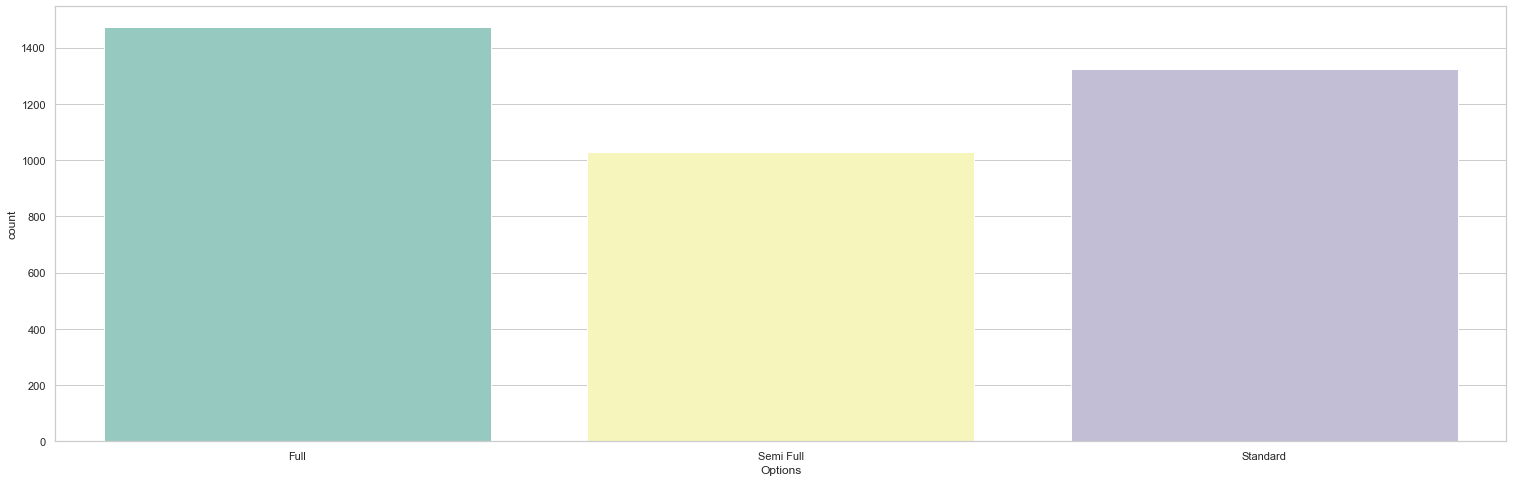

In [1140]:
plt.figure(figsize=(26,8))
sns.countplot(df['Options'])

**Drop Columns**

There needs to be consideration before dropping a column or feature. As a consideration, at this early stage we can use domain knowledge to decide which features are deemed to be irrelevant.
- If reviewed based on domain knowledge, features 'Negotiable' have no relevance and importance for predictive analysis.

In [1141]:
df=df.drop(columns=df[['Negotiable']])

- Overall distribution of the data

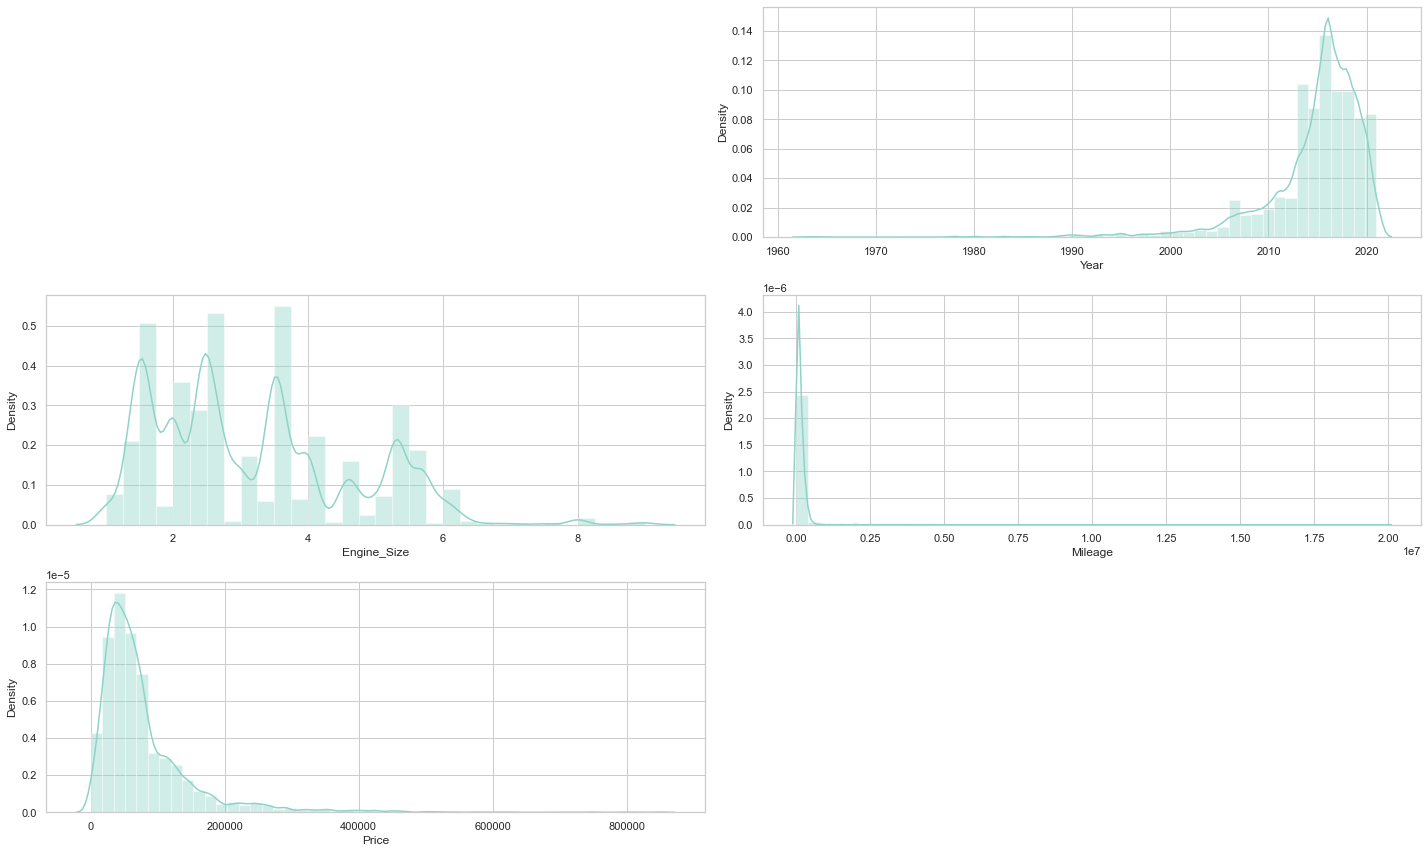

In [1142]:
plt.figure(figsize=(20,20))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(5, 2, i)
        sns.distplot(df[col], kde_kws = {'bw' : 0.1}, ax=ax)
        plt.xlabel(col)
        plt.tight_layout()
        
plt.show();

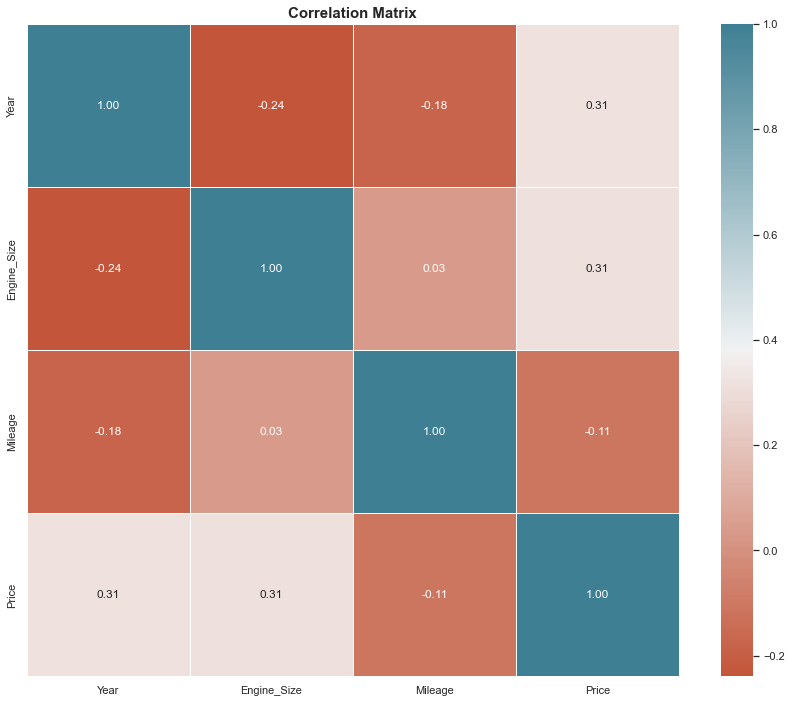

In [1143]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

**Outliers Detection**

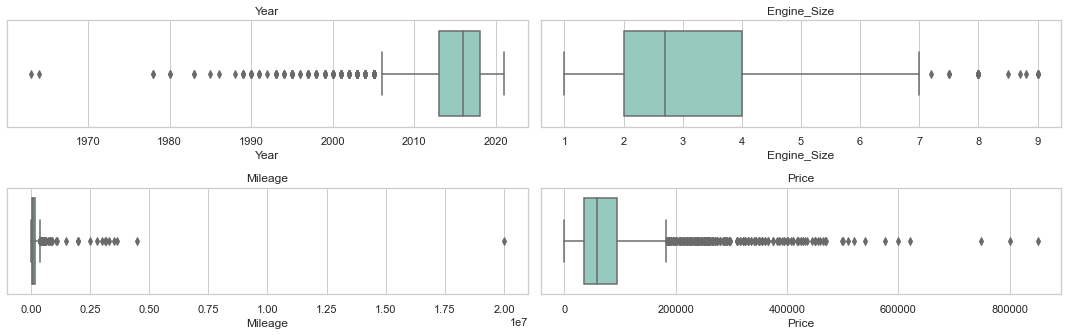

In [1144]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,2, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

There are some outliers in some features. In this project, to create a dataset that is cleaner from outliers, We need to do some data engineering on the features by considering the combination of the results of the IQR method and also the domain knowledge. Later, the resulting model can only predict new listings whose values ​​are in the data range based on this 'clean dataset' only. Outside the data range, the prediction results from the model will be biased.

In [1145]:
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    upperlimit=q3+limit
    lowerlimit=q1-limit
    print(f'Upper Limit: {upperlimit}')
    print(f'Lower Limit: {lowerlimit}')

In [1146]:
# Outliers in Mileage
outliers(df['Mileage'])

IQR: 135000.0
Upper Limit: 385500.0
Lower Limit: -154500.0


In [1148]:
df=df[df['Mileage']<385500]

We just remove the Mileage's outlier since it only contains small amount of data (82 rows)

Mileage Range: 1-385500

In [1149]:
# Outliers in Year
outliers(df['Year'])

IQR: 4.0
Upper Limit: 2024.0
Lower Limit: 2008.0


In [1152]:
df=df[df['Year']>2008]

We just remove the year's outlier since it only contains small amount of data (92 rows)

Year Range: 2008-2021

In [1153]:
# Outliers in Price
outliers(df['Price'])

IQR: 60000.0
Upper Limit: 190000.0
Lower Limit: -50000.0


In [1156]:
df=df[df['Price']<190000]

We just remove the Price's outlier since it only contains small amount of data (231 rows)

Price Range: 1-190000

**Clean Dataset**

In [1157]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
5615,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,56000
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


# **Modeling**

In [1158]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

In [1159]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Price'],
      dtype='object')

In [1160]:
# Change categorical value to numerical

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first',handle_unknown = "ignore"), ['Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Type']),
], remainder='passthrough')

**Data Splitting**

In [1161]:
X=df.drop(columns='Price')
y=df['Price']

**Train and Test Splitting**

In [1162]:
# Splitting training data and test with 80:20 proportion
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

**Choose a Benchmark Model**

In [1165]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Scaling data
standard = StandardScaler(with_mean=False)
minmax = MinMaxScaler()
robust = RobustScaler(with_centering=False)

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-20936.21083233 -16385.28059756 -18675.77479969 -19411.50992035
 -23058.64244024] LinearRegression()
[-14140.45838697 -11591.66206228 -12940.2615704  -12165.40639895
 -14171.37587082] LinearRegression()
[-0.95294712 -0.74420378 -0.46512011 -1.33537572 -1.6553945 ] LinearRegression()
[-23267.40953307 -20435.28914133 -22089.70681399 -22202.99138854
 -24136.09106776] KNeighborsRegressor()
[-16238.3581854  -14077.09270217 -15294.63905325 -14960.11660079
 -15572.86719368] KNeighborsRegressor()
[-1.01389105 -0.70550483 -0.44156209 -1.33507411 -1.49764443] KNeighborsRegressor()
[-28310.24854355 -22207.28490199 -27783.63925693 -27376.89212188
 -28035.30654777] DecisionTreeRegressor(random_state=1)
[-17619.9704142  -14192.27218935 -17375.24654832 -17114.22529644
 -16993.1798419 ] DecisionTreeRegressor(random_state=1)
[-1.21595401 -0.58719995 -0.42686799 -1.5480684  -1.33709241] DecisionTreeRegressor(random_state=1)
[-20817.48280828 -16420.61973345 -20864.28380181 -20961.06413377
 -23064.364650

In [1166]:
# Result evaluation from 5 algorithm
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-19693.483718,2232.850754,-13001.832858,1035.015060,-1.030608,0.422156
1,KNN Regressor,-22426.297589,1245.643343,-15228.614747,712.817654,-0.998735,0.389536
2,DecisionTree Regressor,-26742.674274,2288.396138,-16658.978858,1252.208096,-1.023037,0.437465
3,RandomForest Regressor,-20425.563026,2174.197933,-12600.409954,885.683018,-1.010278,0.433617
4,XGBoost Regressor,-19332.704421,2167.342105,-12100.328071,771.114803,-0.969242,0.413694


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediction to test set with XGBoost& Linear Regression Model

In [1167]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'Linear Regression': LinearRegression()
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,21867.023591,12552.958984,251.171736
Linear Regression,22062.928708,13249.950586,226.790039


**Hyperparameter Tuning for XGBoost**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari Linear Regression, maka selanjutnya kita akan menggunakan model XGBoost dan Linear Regression untuk di tuning. Selanjutnya yang terbaik akan ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [1168]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))
# Learning rate
learning_rate = list(np.arange(1, 100)/100)
# Jumlah pohon
n_estimators = list(np.arange(100, 201))
# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(5, 10)/10)
# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 8)) # Semakin besar nilainya, semakin konservatif/simpel modelnya
# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(3, 10)/10)
# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'scaler':[minmax, standard, robust]
}

In [1169]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 500,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error','neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [1170]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Region',
                                                                                'Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options',
                                                                                'Type'])])),
                                             ('scaler',
                                              RobustScaler(with_centering=False)),
                                             ('model',
                                              XGBR...
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'scaler': [MinMaxScaler(),
                                                   StandardScaler(with_mean=False),
                                                   RobustScaler(with_centering=False)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [1171]:
# Tuning result in dataframe format. Sorted based on MAE, RMSE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
14,0.655798,0.015843,0.021601,0.003878,RobustScaler(with_centering=False),0.9,1.29155,180,8,0.12,...,808.653824,1,-1.004318,-0.579075,-0.418961,-1.271814,-1.493778,-0.953589,0.405397,21
326,0.478596,0.009515,0.016603,0.000489,RobustScaler(with_centering=False),0.9,0.007743,186,7,0.13,...,873.035683,3,-0.973952,-0.576403,-0.435699,-1.307688,-1.543853,-0.967519,0.420409,45
485,0.588197,0.007707,0.020001,0.000626,StandardScaler(with_mean=False),0.8,0.002783,182,10,0.12,...,924.524549,2,-0.984360,-0.567196,-0.409590,-1.345862,-1.491502,-0.959702,0.421716,24
168,0.417796,0.006550,0.020204,0.000750,StandardScaler(with_mean=False),0.9,0.059948,189,9,0.11,...,728.079472,10,-1.021006,-0.588738,-0.433159,-1.267508,-1.510482,-0.964178,0.404135,32
26,0.519401,0.129850,0.021201,0.007518,RobustScaler(with_centering=False),0.8,0.464159,155,7,0.11,...,847.137182,5,-0.967961,-0.598306,-0.440367,-1.305950,-1.564408,-0.975398,0.420645,61


In [1172]:
# Check for score and best params
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -18448.2742830583
Best_params: {'scaler': RobustScaler(with_centering=False), 'model__subsample': 0.9, 'model__reg_alpha': 1.2915496650148828, 'model__n_estimators': 180, 'model__max_depth': 8, 'model__learning_rate': 0.12, 'model__gamma': 5, 'model__colsample_bytree': 0.5}


**Hyperparameter Tuning for Linear Regression**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari Linear Regression, maka selanjutnya kita akan menggunakan model XGBoost dan Linear Regression untuk di tuning. Selanjutnya yang terbaik akan ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model Linear Regression dengan harapan dapat meningkatkan performa model.

In [1173]:
# Kedalaman pohon
fit_intercept = [True,False]
# Learning rate
normalize = [True,False]
# Jumlah pohon
copy_X = [True,False]
# Jumlah baris tiap pohon (% dari total baris train set)
n_jobs = [True,False]
# Gamma (min_impurity_decrease)
positive = [True,False] # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space lr
hyperparam_space_lr = {
    'model__fit_intercept': fit_intercept, 
    'model__normalize': normalize,
    'model__copy_X': copy_X,
    'model__n_jobs': n_jobs,
    'model__positive': positive,
    'scaler':[minmax, standard, robust]
}

In [1174]:
# Benchmark model dengan hyperparameter tuning
lr = LinearRegression()

# Membuat algorithm chains
estimator_lr = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', lr)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_lr = RandomizedSearchCV(
    estimator_lr, 
    param_distributions = hyperparam_space_lr,
    n_iter = 500,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error','neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [1175]:
# Fitting data training untuk mencari parameter terbaik
random_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Region',
                                                                                'Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options',
                                                                                'Type'])])),
                                             ('scaler',
                                              RobustScaler(with_centering=False)),
                                             ('model', Line...
                                        'model__fit_intercept': [True, False],
                                        'model__n_jobs': [True, False],
                                        'model__normalize': [True, False],
                                        'model__positive': [True, False],
                                        'scaler': [MinMaxScaler(),
                                                   StandardScaler(with_mean=False),
                                                   RobustScaler(with_centering=False)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [1176]:
# Tuning result in dataframe format. Sorted based on MAE, RMSE & MAPE
pd.DataFrame(random_lr.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_model__positive,param_model__normalize,param_model__n_jobs,param_model__fit_intercept,param_model__copy_X,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
11,0.126596,0.019324,0.009210,0.000750,RobustScaler(with_centering=False),False,False,True,True,True,...,1035.015060,1,-0.952947,-0.744204,-0.465120,-1.335376,-1.655394,-1.030608,0.422156,17
23,0.125199,0.013198,0.009399,0.000797,RobustScaler(with_centering=False),False,False,False,True,True,...,1035.015060,1,-0.952947,-0.744204,-0.465120,-1.335376,-1.655394,-1.030608,0.422156,17
59,0.128196,0.028917,0.009406,0.000802,RobustScaler(with_centering=False),False,False,True,True,False,...,1035.015060,1,-0.952947,-0.744204,-0.465120,-1.335376,-1.655394,-1.030608,0.422156,17
71,0.127599,0.012310,0.012003,0.003690,RobustScaler(with_centering=False),False,False,False,True,False,...,1035.015060,1,-0.952947,-0.744204,-0.465120,-1.335376,-1.655394,-1.030608,0.422156,17
4,0.033197,0.007440,0.017000,0.010842,StandardScaler(with_mean=False),False,True,True,True,True,...,994.419945,13,-0.955915,-0.748964,-0.464963,-1.336219,-1.651529,-1.031518,0.420426,21


In [1177]:
# Check for score and best params
print('Linear Regression')
print('Best_score:', random_lr.best_score_)
print('Best_params:', random_lr.best_params_)

Linear Regression
Best_score: -19693.48371803417
Best_params: {'scaler': RobustScaler(with_centering=False), 'model__positive': False, 'model__normalize': False, 'model__n_jobs': True, 'model__fit_intercept': True, 'model__copy_X': True}


In [1178]:
print('Best_score XGB:', random_xgb.best_score_)
print('Best_score Linear Regression:', random_lr.best_score_)

Best_score XGB: -18448.2742830583
Best_score Linear Regression: -19693.48371803417


Still, by comparison, XGBoost has the best score even after hyperparameter tuning

**Predict to Test Set with the Tuned Model**

In [1179]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning,'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,21009.581422,12233.194086,236.71934


**Performance Comparison**

The performance comparison of the model XGBoost before and after hyperparameter tuning.

In [1180]:
# Sebelum hyperparameter tuning
print(pd.DataFrame(score_before_tuning.loc['XGB']).T)
# Setelah hyperparameter tuning
print(score_after_tuning)

             RMSE           MAE        MAPE
XGB  21867.023591  12552.958984  251.171736
             RMSE           MAE       MAPE
XGB  21009.581422  12233.194086  236.71934


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE decrease) with hyperparameter tuning.
- RMSE, MAE & MAPE before tuning: 21867.023591  12552.958984  251.171736
- RMSE, MAE & MAPE after tuning: 21359.649204  12383.784576  244.567686

[Text(0.5, 1.0, 'Price vs. Residual'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Residual')]

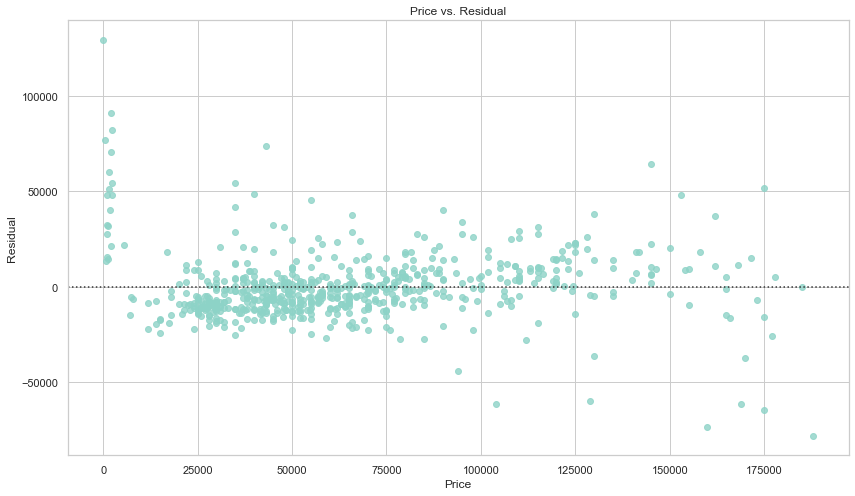

In [1181]:
plt.figure(figsize=(14, 8))
sns.residplot(x=y_test, y=y_pred_xgb_tuning).set(title='Price vs. Residual', 
                                               xlabel='Price', 
                                               ylabel='Residual')

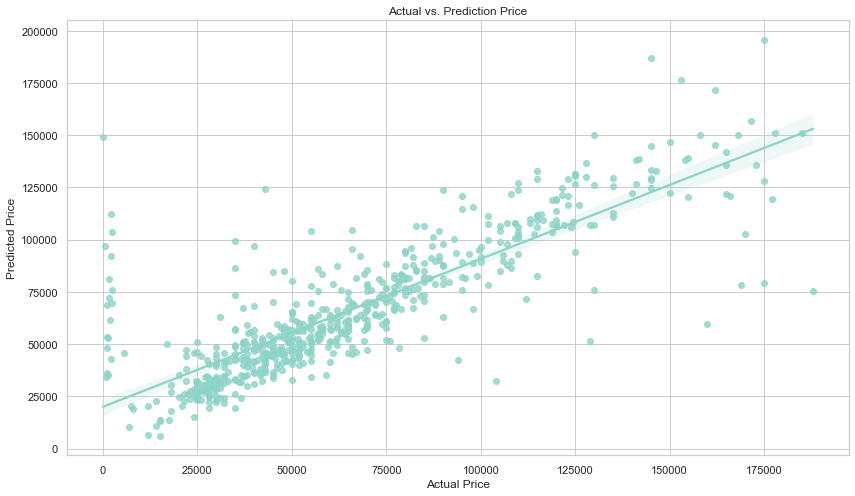

In [1182]:
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

In order to find out what features actually affect the target (price), we can check it through feature_importances function.

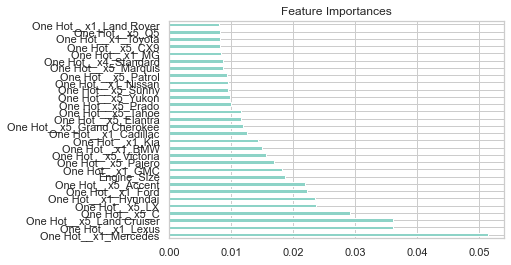

In [1183]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(30)
feature_imp.plot(kind='barh', title='Feature Importances');

**XGBoost Regressor Explanation**

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.


XGBoost is part of trees algorithm (Decision tree, Random Forest, bagging, boosting, gradient boosting). The main goal of XGBoost is to reduce bias and variance by creating weak trees sequentially so that each new tree (or learner) focuses on the weakness (misclassified data) of the previous tree. After weak learners are added, the data weights are readjusted, which is known as "re-weighting". Overall form a strong model after convergence because of the automatic correction after each new learner is added.

How it works:

Basically, it works like a decision tree, for this case, the decision tree is meant for regression.

There are several parameters considered: 

max_depth, maximum tree depth for base learners. The deeper the tree, the more complex the model. However, if the tree is too deep, the split becomes less relevant and will cause the model to overfit.

learning_rate, Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and learning_rate shrinks the feature weights to make the boosting process more conservative.

n_estimators, the amount of tree (choose the optimal number of tree).

subsample, subsampling ratio of the training instances. It will occur once in every boosting iteration. Subsample ratio = 0.5 means that the algorithm would randomly sample half of the training data prior to growing trees. 

gamma, minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

colsample_bytree, subsample ratio of columns or features when constructing each tree. Similarly, it occurs once in every boosting iteration. Colsample_bytree = 1 means that we will use all features.

reg_alpha, L1 regularization parameters to avoid overfitting or control model complexity. 

In [1184]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
5615,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,56000
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


# **Data Preprocessing (Cleaning & EDA) 2x**

 We're going to preprocess the data again and remodelling it again since the model performance is not that good.

**Outliers Detection**

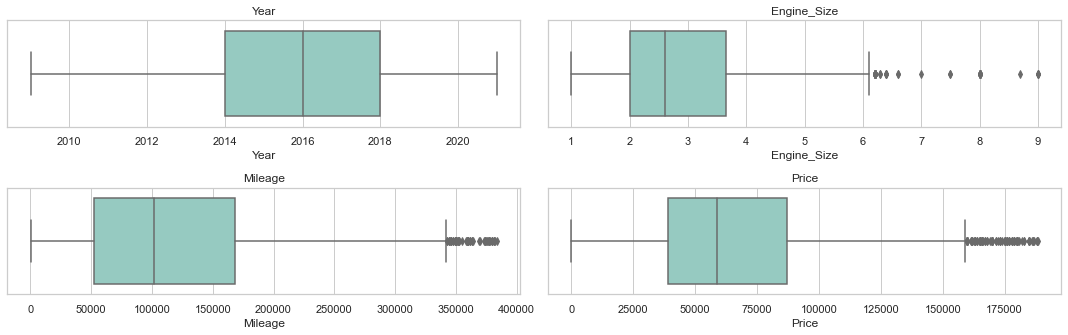

In [1185]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,2, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [1250]:
# Outliers in Price
outliers(df['Price'])
# Outliers in Mileage
outliers(df['Mileage'])
# Outliers in Engine_Size
outliers(df['Engine_Size'])
df=df[df['Year']>2010]
df=df[df['Price']<159000]
df=df[df['Mileage']<342000]
df=df[df['Engine_Size']<7]

IQR: 59000.0
Upper Limit: 182500.0
Lower Limit: -53500.0
IQR: 135000.0
Upper Limit: 385500.0
Lower Limit: -154500.0
IQR: 2.0
Upper Limit: 7.0
Lower Limit: -1.0


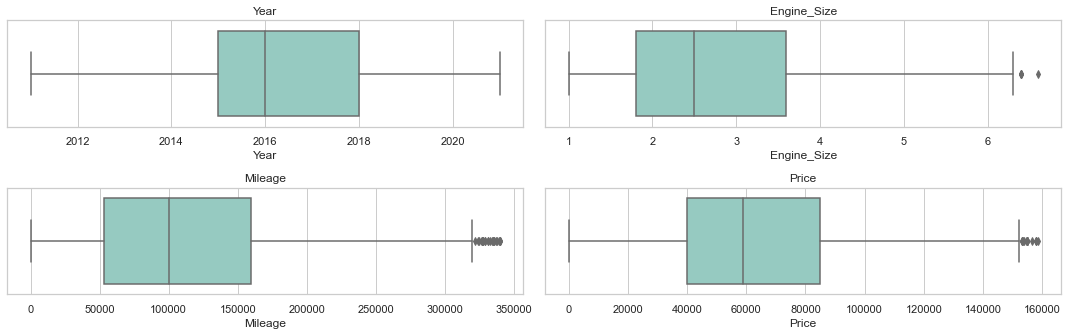

In [1251]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,2, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [1252]:
# Outliers in Year
outliers(df['Year'])
# Outliers in Price
outliers(df['Price'])
# Outliers in Mileage
outliers(df['Mileage'])
# Outliers in Engine_Size
outliers(df['Engine_Size'])

IQR: 3.0
Upper Limit: 2022.5
Lower Limit: 2010.5
IQR: 45000.0
Upper Limit: 152500.0
Lower Limit: -27500.0
IQR: 106854.0
Upper Limit: 320281.0
Lower Limit: -107135.0
IQR: 1.8
Upper Limit: 6.300000000000001
Lower Limit: -0.9000000000000001


In [1317]:
df=df[df['Year']>2010]
df=df[df['Price']<150500]
df=df[df['Mileage']<315500]
df=df[df['Engine_Size']<=6]

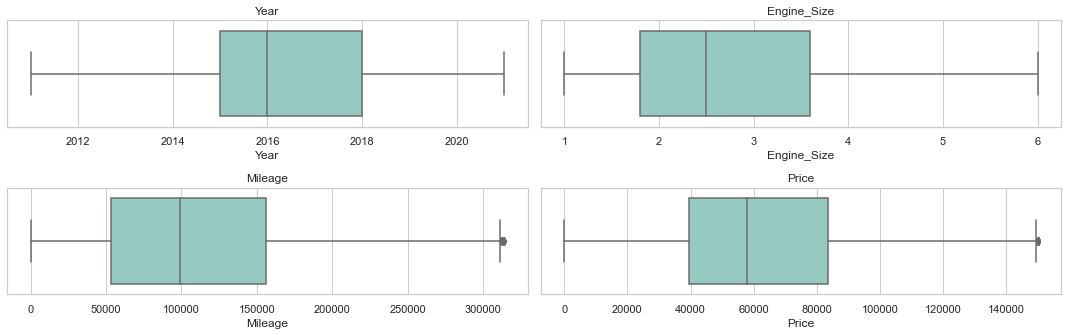

In [1344]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,2, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

**Clean Dataset**

In [1358]:
xxx=df
xxx

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
8,Avalon,Riyadh,Toyota,Automatic,Saudi,Standard,2016,3.5,110864,False,81500
...,...,...,...,...,...,...,...,...,...,...,...
5613,Taurus,Dammam,Ford,Automatic,Other,Semi Full,2016,3.5,123000,False,65000
5615,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,False,56000
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000


**Encoding**

In [1319]:
# Change categorical value to numerical

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first',handle_unknown = "ignore"), ['Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Type']),
], remainder='passthrough')

**Data Splitting**

In [1320]:
X=df.drop(columns='Price')
y=df['Price']

**Train and Test Splitting**

In [1321]:
# Splitting training data and test with 80:20 proportion
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

**Choose a Benchmark Model**

In [1322]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Scaling data
standard = StandardScaler(with_mean=False)
minmax = MinMaxScaler()
robust = RobustScaler(with_centering=False)

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-16732.90312647 -18709.38381319 -18235.98668366 -19165.21716338
 -19420.34346787] LinearRegression()
[-11345.3847556  -11763.17779439 -12092.60554502 -11538.97100829
 -12180.19814822] LinearRegression()
[  -0.65635979   -1.38845715   -1.11068109   -1.93651369 -296.39750674] LinearRegression()
[-18720.55279737 -22417.22344309 -20407.81747216 -19438.35977216
 -21550.90892095] KNeighborsRegressor()
[-13281.39459459 -14987.77882883 -13950.63648649 -12276.25315315
 -14058.86261261] KNeighborsRegressor()
[  -0.78070509   -1.48310852   -1.22773569   -1.74155384 -267.0685066 ] KNeighborsRegressor()
[-25321.78638002 -27854.53271377 -26192.19392356 -25100.34747709
 -28668.18694685] DecisionTreeRegressor(random_state=1)
[-15981.66891892 -17046.20720721 -16740.67792793 -14999.25
 -17009.23873874] DecisionTreeRegressor(random_state=1)
[  -0.75067926   -1.67514764   -1.17948226   -2.09778806 -331.24875176] DecisionTreeRegressor(random_state=1)
[-18036.7273988  -20549.9045504  -19376.94861213 -19549

In [1323]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-18452.766851,950.217564,-11784.067450,317.825876,-60.297904,118.050530
1,KNN Regressor,-20506.972481,1347.733071,-13710.985135,900.184152,-54.460322,106.304566
2,DecisionTree Regressor,-26627.409488,1406.882136,-16355.408559,778.713878,-67.390370,131.929972
3,RandomForest Regressor,-19593.626131,908.766548,-12144.699795,400.568506,-63.712906,124.800450
4,XGBoost Regressor,-18380.448980,781.876118,-11329.725265,398.244091,-60.503672,118.510765


**Predict to Test Set with the Benchmark Model**

Prediction to test set with XGBoost& Linear Regression Model

In [1324]:
# Benchmark best model
models = {
    'XGB': XGBRegressor(random_state=1),
    'Linear Regression' : LinearRegression()
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,17386.389272,10739.586713,0.942993
Linear Regression,17941.522092,11152.255198,1.024127


**Hyperparameter Tuning for XGBoost**

In [1325]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))
# Learning rate
learning_rate = list(np.arange(1, 100)/100)
# Jumlah pohon
n_estimators = list(np.arange(100, 201))
# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)
# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya
# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(3, 10)/10)
# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'scaler':[minmax, standard, robust]
}

In [1326]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 500,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error','neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [1327]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Region',
                                                                                'Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options',
                                                                                'Type'])])),
                                             ('scaler',
                                              RobustScaler(with_centering=False)),
                                             ('model',
                                              XGBR...
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9],
                                        'scaler': [MinMaxScaler(),
                                                   StandardScaler(with_mean=False),
                                                   RobustScaler(with_centering=False)]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [1328]:
# Tuning result in dataframe format. Sorted based on MAE, RMSE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
18,0.472390,0.006498,0.016604,0.001854,RobustScaler(with_centering=False),0.8,0.021544,167,8,0.09,...,205.829251,1,-0.796933,-1.393729,-1.076846,-1.816544,-300.228837,-61.062578,119.583610,101
448,0.489997,0.009054,0.016798,0.000397,RobustScaler(with_centering=False),0.8,0.059948,150,10,0.13,...,417.941996,2,-0.773738,-1.335184,-1.133727,-1.856285,-284.987466,-58.017280,113.485633,53
159,0.524398,0.044053,0.027801,0.014635,RobustScaler(with_centering=False),0.8,0.007743,158,8,0.08,...,283.647222,3,-0.761554,-1.347721,-1.116766,-1.813547,-286.028487,-58.213615,113.907948,57
285,0.384202,0.042687,0.016999,0.001259,StandardScaler(with_mean=False),0.9,3.593814,187,7,0.08,...,241.218409,4,-0.792029,-1.384532,-1.112541,-1.810299,-295.367917,-60.093464,117.637701,81
489,0.420196,0.049128,0.023205,0.007781,StandardScaler(with_mean=False),0.9,10.0,135,8,0.14,...,278.807180,5,-0.792472,-1.342132,-1.107303,-1.879752,-267.614658,-54.547264,106.534290,33


In [1329]:
# Check for score and best params
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -10992.521924268018
Best_params: {'scaler': RobustScaler(with_centering=False), 'model__subsample': 0.8, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 167, 'model__max_depth': 8, 'model__learning_rate': 0.09, 'model__gamma': 2, 'model__colsample_bytree': 0.7}


**Hyperparameter Tuning for Linear Regression**

In [1330]:

fit_intercept = [True,False]

normalize = [True,False]

copy_X = [True,False]

n_jobs = [True,False]

positive = [True,False] 


# Hyperparam space lr
hyperparam_space_lr = {
    'model__fit_intercept': fit_intercept, 
    'model__normalize': normalize,
    'model__copy_X': copy_X,
    'model__n_jobs': n_jobs,
    'model__positive': positive,
    'scaler':[minmax, standard, robust]
}

In [1331]:
# Benchmark model dengan hyperparameter tuning
lr = LinearRegression()

# Membuat algorithm chains
estimator_lr = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', lr)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_lr = RandomizedSearchCV(
    estimator_lr, 
    param_distributions = hyperparam_space_lr,
    n_iter = 500,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error','neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [1332]:
# Fitting data training untuk mencari parameter terbaik
random_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Region',
                                                                                'Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options',
                                                                                'Type'])])),
                                             ('scaler',
                                              RobustScaler(with_centering=False)),
                                             ('model', Line...
                                        'model__fit_intercept': [True, False],
                                        'model__n_jobs': [True, False],
                                        'model__normalize': [True, False],
                                        'model__positive': [True, False],
                                        'scaler': [MinMaxScaler(),
                                                   StandardScaler(with_mean=False),
                                                   RobustScaler(with_centering=False)]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [1333]:
# Tuning result in dataframe format. Sorted based on MAE, RMSE & MAPE
pd.DataFrame(random_lr.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error','rank_test_neg_root_mean_squared_error' , 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_model__positive,param_model__normalize,param_model__n_jobs,param_model__fit_intercept,param_model__copy_X,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
11,0.101398,0.004314,0.009402,0.000800,RobustScaler(with_centering=False),False,False,True,True,True,...,317.825876,1,-0.656360,-1.388457,-1.110681,-1.936514,-296.397507,-60.297904,118.05053,17
23,0.112994,0.013368,0.011604,0.001630,RobustScaler(with_centering=False),False,False,False,True,True,...,317.825876,1,-0.656360,-1.388457,-1.110681,-1.936514,-296.397507,-60.297904,118.05053,17
59,0.106604,0.008915,0.010397,0.001625,RobustScaler(with_centering=False),False,False,True,True,False,...,317.825876,1,-0.656360,-1.388457,-1.110681,-1.936514,-296.397507,-60.297904,118.05053,17
71,0.114998,0.012182,0.011402,0.003135,RobustScaler(with_centering=False),False,False,False,True,False,...,317.825876,1,-0.656360,-1.388457,-1.110681,-1.936514,-296.397507,-60.297904,118.05053,17
5,0.092001,0.012508,0.009802,0.000401,RobustScaler(with_centering=False),False,True,True,True,True,...,346.123483,5,-0.658349,-1.389113,-1.116148,-1.938666,-296.401300,-60.300715,118.05102,21


In [1334]:
# Check for score and best params
print('Linear Regression')
print('Best_score:', random_lr.best_score_)
print('Best_params:', random_lr.best_params_)

Linear Regression
Best_score: -11784.06745030355
Best_params: {'scaler': RobustScaler(with_centering=False), 'model__positive': False, 'model__normalize': False, 'model__n_jobs': True, 'model__fit_intercept': True, 'model__copy_X': True}


Best Score (XGB)

In [1335]:
print('Best_score XGB:', random_xgb.best_score_)
print('Best_score Linear Regression:', random_lr.best_score_)

Best_score XGB: -10992.521924268018
Best_score Linear Regression: -11784.06745030355


**Predict to Test Set with the Tuned Model**

In [1336]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning,'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,16237.127654,10087.208183,0.938595


**Performance Comparison**

The performance comparison of the model XGBoost before and after hyperparameter tuning.

In [1337]:
# Sebelum hyperparameter tuning
print(pd.DataFrame(score_before_tuning.loc['XGB']).T)
# Setelah hyperparameter tuning
print(score_after_tuning)

             RMSE           MAE      MAPE
XGB  17386.389272  10739.586713  0.942993
             RMSE           MAE      MAPE
XGB  16237.127654  10087.208183  0.938595


Model has improved the performance (nilai RMSE, MAE & MAPE decrease) after hyperparameter tuning.
- RMSE, MAE & MAPE before tuning: 17386.389272  10739.586713  0.942993
- RMSE, MAE & MAPE after tuning: 16237.127654  10087.208183  0.938595

[Text(0.5, 1.0, 'Price vs. Residual'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Residual')]

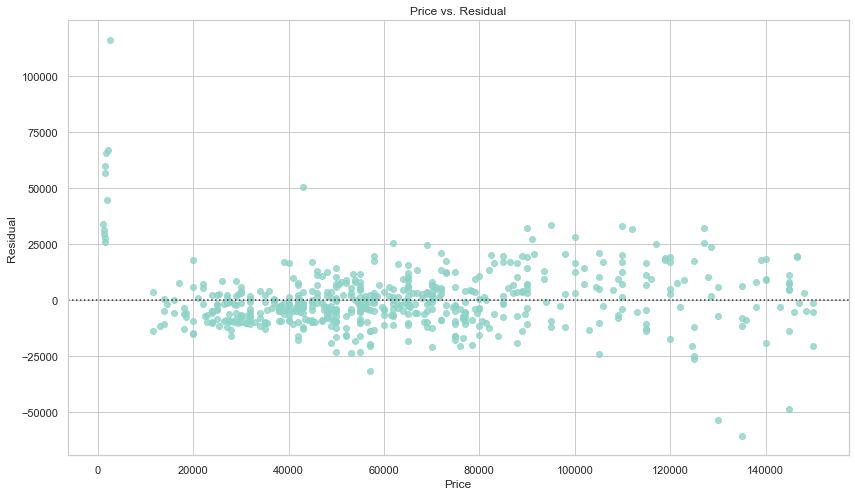

In [1346]:
plt.figure(figsize=(14, 8))
sns.residplot(x=y_test, y=y_pred_xgb_tuning).set(title='Price vs. Residual', 
                                               xlabel='Price', 
                                               ylabel='Residual')

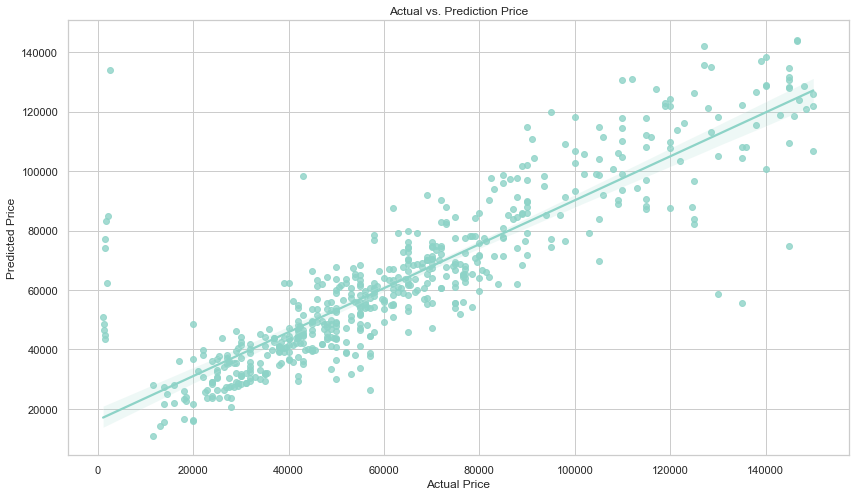

In [1345]:
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

In order to find out what features actually affect the target (price), we can check it through feature_importances function.

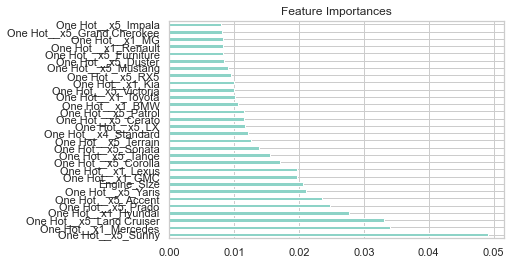

In [1340]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(30)
feature_imp.plot(kind='barh', title='Feature Importances');

# **Conclusion**

Based on the modeling that has been done, the 'Make', 'Engine Size' and 'Year' features are the features that have the most influence on 'price'.

The evaluation metrics used in the model are RMSE, MAE & MAPE values. If we look at the RMSE value generated by the model after hyperparameter tuning, which is 17386.389272, we can conclude that if the model we created later is used to estimate the price of used cars for the Saudi Arabia area in the range of values ​​as trained on the model (price under 150500, mileage under 315500, year above 2010)

Then, the estimated average price will be inaccurate by approximately 17300 from the price that might have been. However, it is also possible that this predictions may be missed more than that number. The bias generated by this model is due to the lack of features in the dataset that can represent the price according to the color of the car, number of doors, type of fuel, number of seats. The lack of datasets for modeling also makes the prediction results less precise.

# **Recommendation**

Things that can be done to develop the model to be even better, such as:

1. Check which predictions have a high error value. We can group these errors into overestimation and underestimation groups, then choose only the most extreme 5% errors for each group. Later the grouping will be divided into 3 groups, namely overestimation (5%), underestimation (5%), and the majority group whose error is close to the mean value (90%). After that we can check the relationship between the error and each independent variable. In the end, we can find out exactly which variables and what aspects cause the model to produce high errors, so we can retrain with the application of other engineering features.
<br><br>
2. If possible, add features that are more correlated with the target ('price'), such as car color, number of doors, type of fuel, number of seats. In addition, the addition of the latest data for Saudi Arabia Used Cars will certainly increase the predictive capacity of the model.
<br><br>
3. The addition of data samples is highly recommended so that the model has more data to study so that the residuals from the prediction results can be reduced, especially on used car data that has a high price.
<br><br>
4. If you add a lot of data, you can try using a more complex model, such as recursive neural networks (RNN). However, if the amount of data and features is still like this dataset, it will most likely not change the results significantly.
<br><br>

#### **Save Model**

In [1354]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('SAUsedCars_XGB.sav', 'wb'))

In [1355]:
# Load model
filename = 'SAUsedCars_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))